# **Fetching Data from an API**
Fetching data from APIs using Python involves utilizing the requests library to make HTTP requests to a remote server and retrieve data. APIs (Application Programming Interfaces) provide a standardized way for different software applications to communicate and exchange information. 

## **Import Required Libraries**

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

## **Setup the API**

In [2]:
url = "https://air-quality.p.rapidapi.com/history/airquality"

querystring = {"lon":"87.0624","lat":"23.1645"}

headers = {
	"X-RapidAPI-Key": "YOUR_API_KEY",
	"X-RapidAPI-Host": "air-quality.p.rapidapi.com"
}

## **Send the Request**

In [3]:
response = requests.get(url, headers=headers, params=querystring)

print(response.json())

{'city_name': 'Bānkura', 'country_code': 'IN', 'data': [{'aqi': 74, 'co': 212.3, 'datetime': '2023-08-25:16', 'no2': 8.7, 'o3': 51.7, 'pm10': 34.3, 'pm25': 23.33, 'so2': 46, 'timestamp_local': '2023-08-25T21:30:00', 'timestamp_utc': '2023-08-25T16:00:00', 'ts': 1692979200}, {'aqi': 76, 'co': 218, 'datetime': '2023-08-25:15', 'no2': 9, 'o3': 56, 'pm10': 35, 'pm25': 24, 'so2': 47, 'timestamp_local': '2023-08-25T20:30:00', 'timestamp_utc': '2023-08-25T15:00:00', 'ts': 1692975600}, {'aqi': 73, 'co': 205.7, 'datetime': '2023-08-25:14', 'no2': 8.3, 'o3': 63.7, 'pm10': 33.3, 'pm25': 22.67, 'so2': 49, 'timestamp_local': '2023-08-25T19:30:00', 'timestamp_utc': '2023-08-25T14:00:00', 'ts': 1692972000}, {'aqi': 70, 'co': 193.3, 'datetime': '2023-08-25:13', 'no2': 7.7, 'o3': 71.3, 'pm10': 31.7, 'pm25': 21.33, 'so2': 51, 'timestamp_local': '2023-08-25T18:30:00', 'timestamp_utc': '2023-08-25T13:00:00', 'ts': 1692968400}, {'aqi': 67, 'co': 181, 'datetime': '2023-08-25:12', 'no2': 7, 'o3': 79, 'pm10':

## **Convert JSON into Dataframe**

In [4]:
# Converting json into dataframe
df = pd.DataFrame(response.json()["data"])

In [5]:
df.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,74,212.3,2023-08-25:16,8.7,51.7,34.3,23.33,46.0,2023-08-25T21:30:00,2023-08-25T16:00:00,1692979200
1,76,218.0,2023-08-25:15,9.0,56.0,35.0,24.00,47.0,2023-08-25T20:30:00,2023-08-25T15:00:00,1692975600
2,73,205.7,2023-08-25:14,8.3,63.7,33.3,22.67,49.0,2023-08-25T19:30:00,2023-08-25T14:00:00,1692972000
3,70,193.3,2023-08-25:13,7.7,71.3,31.7,21.33,51.0,2023-08-25T18:30:00,2023-08-25T13:00:00,1692968400
4,67,181.0,2023-08-25:12,7.0,79.0,30.0,20.00,53.0,2023-08-25T17:30:00,2023-08-25T12:00:00,1692964800


In [6]:
df.shape

(72, 11)

## **Preparing the Data**

In [7]:
# Extracting only required columns
required_columns = ["timestamp_local", "aqi", "no2", "so2", "o3", "co", "pm10", "pm25"]
weather_data = df[required_columns]

In [8]:
weather_data.head()

,timestamp_local,aqi,no2,so2,o3,co,pm10,pm25
0,2023-08-25T21:30:00,74,8.7,46.0,51.7,212.3,34.3,23.33
1,2023-08-25T20:30:00,76,9.0,47.0,56.0,218.0,35.0,24.00
2,2023-08-25T19:30:00,73,8.3,49.0,63.7,205.7,33.3,22.67
3,2023-08-25T18:30:00,70,7.7,51.0,71.3,193.3,31.7,21.33
4,2023-08-25T17:30:00,67,7.0,53.0,79.0,181.0,30.0,20.00


In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp_local  72 non-null     object 
 1   aqi              72 non-null     int64  
 2   no2              72 non-null     float64
 3   so2              72 non-null     float64
 4   o3               72 non-null     float64
 5   co               72 non-null     float64
 6   pm10             72 non-null     float64
 7   pm25             72 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.6+ KB


In [10]:
# Converting 'timestamp_local' column into datetime object
weather_data["timestamp_local"] = pd.to_datetime(weather_data["timestamp_local"])

In [11]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp_local  72 non-null     datetime64[ns]
 1   aqi              72 non-null     int64         
 2   no2              72 non-null     float64       
 3   so2              72 non-null     float64       
 4   o3               72 non-null     float64       
 5   co               72 non-null     float64       
 6   pm10             72 non-null     float64       
 7   pm25             72 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 4.6 KB


In [12]:
# Sorting the data by timestamp
weather_data.sort_values(by="timestamp_local", inplace=True)

In [13]:
# Set the 'timestamp_local' as index
weather_data.set_index("timestamp_local", inplace=True)
weather_data.head()

,aqi,no2,so2,o3,co,pm10,pm25
timestamp_local,,,,,,,
2023-08-22 22:30:00,88,8.3,26.0,51.0,206.3,42.3,29.67
2023-08-22 23:30:00,87,8.0,25.0,48.0,209.0,41.0,29.00
2023-08-23 00:30:00,85,7.3,25.0,46.3,204.0,40.3,28.33
2023-08-23 01:30:00,84,6.7,25.0,44.7,199.0,39.7,27.67
2023-08-23 02:30:00,82,6.0,25.0,43.0,194.0,39.0,27.00


In [17]:
weather_data.shape

(72, 7)

## **Plot the Data**

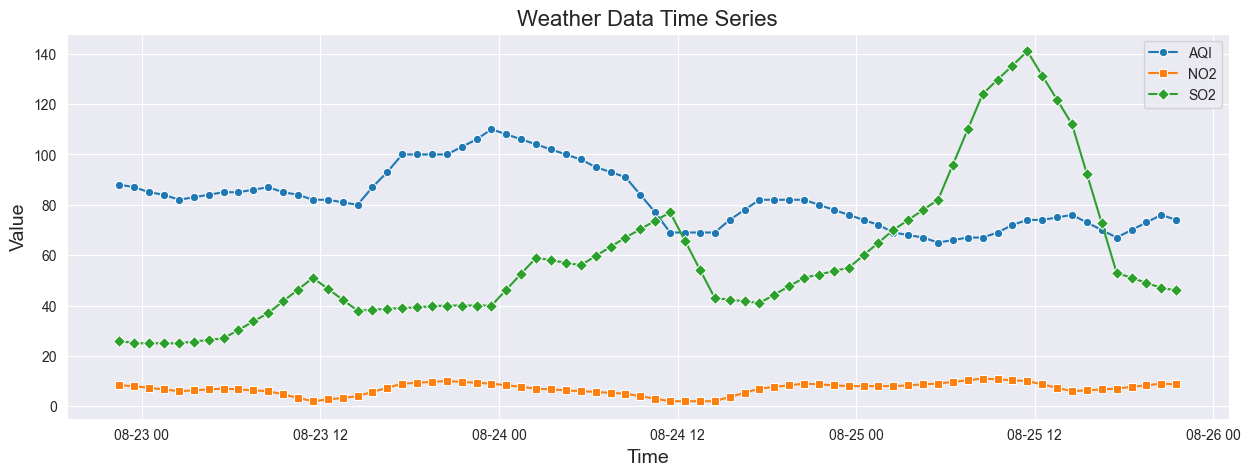

In [50]:
# Plot a line graph
plt.figure(figsize=(15, 5))
sns.lineplot(data=weather_data, x=weather_data.index, y=weather_data.aqi,
             marker="o", label="AQI")
sns.lineplot(data=weather_data, x=weather_data.index, y=weather_data.no2, 
             marker="s", label="NO2")
sns.lineplot(data=weather_data, x=weather_data.index, y=weather_data.so2, 
             marker="D", label="SO2")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.title("Weather Data Time Series", fontsize=16)
plt.show()

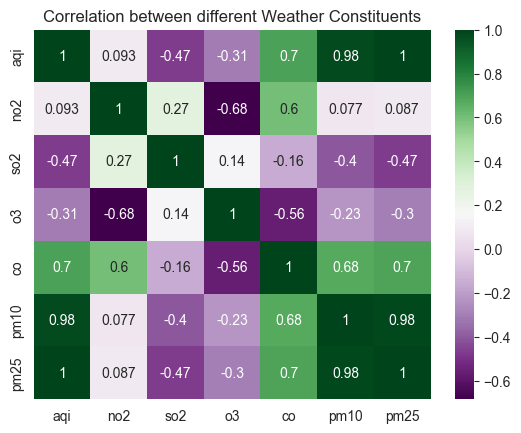

In [59]:
# Plot a heatmap based on correlation of weather constituents
sns.heatmap(weather_data.corr(), annot=True, cmap="PRGn")
plt.title("Correlation between different Weather Constituents", weight="500")
plt.show()

## **Save the Dataframe as CSV**

In [60]:
output_path = r"D:\Coding\Datasets\bankura_one_day_weather.csv"
weather_data.to_csv(output_path)